In [33]:
import pandas as pd

In [34]:
def test_run():
    start_date='2017-11-20'
    end_date='2017-11-30'
    dates=pd.date_range(start_date,end_date)
    
    #create empty df
    df1=pd.DataFrame(index=dates)
    
    #create spy df, spy will tell weekends. index col ensures that
    #SPY is indexed by it's dates rather than ints. Parse dates
    #makes the dates into date objects
    dfspy = pd.read_csv("data/SPY.csv",
                        usecols=['Date','Adj Close'],
                        na_values=['nan'],
                        index_col="Date",parse_dates=True)
    dfspy = dfspy.rename(columns={'Adj Close': 'SPY'})
    #join empty with data
    df1 = df1.join(dfspy,how='inner')
    #drop nan rows
    #Now to add more stocks
    symbols = ['GOOG', 'IBM', 'GLD']
    
    #for loop to read in all data
    for symbol in symbols:
        tmp_df = pd.read_csv("data/{}.csv".format(symbol),
                            usecols=['Date','Adj Close'],
                            na_values=['nan'],
                            index_col="Date",parse_dates=True)
        #if every column is named Adj Close, then that's a problem
        #fix it by naming adj close $(symbol)
        tmp_df = tmp_df.rename(columns={'Adj Close': symbol})
        df1 = df1.join(tmp_df)
    print(df1)
    print(dfspy)

In [35]:
if __name__ == "__main__":
    test_run()

Empty DataFrame
Columns: [SPY, GOOG, IBM, GLD]
Index: []
               SPY
Date              
2012-09-12  144.39
2012-09-11  143.91
2012-09-10  143.51
2012-09-07  144.33
2012-09-06  143.77
2012-09-05  140.91
2012-09-04  141.03
2012-08-31  141.16
2012-08-30  140.49
2012-08-29  141.51
2012-08-28  141.40
2012-08-27  141.54
2012-08-24  141.51
2012-08-23  140.66
2012-08-22  141.82
2012-08-21  141.76
2012-08-20  142.19
2012-08-17  142.18
2012-08-16  141.99
2012-08-15  140.95
2012-08-14  140.79
2012-08-13  140.77
2012-08-10  140.84
2012-08-09  140.61
2012-08-08  140.49
2012-08-07  140.32
2012-08-06  139.62
2012-08-03  139.35
2012-08-02  136.64
2012-08-01  137.59
...            ...
2000-03-14  110.02
2000-03-13  111.60
2000-03-10  112.84
2000-03-09  113.44
2000-03-08  110.22
2000-03-07  110.36
2000-03-06  112.53
2000-03-03  113.64
2000-03-02  111.55
2000-03-01  111.48
2000-02-29  110.67
2000-02-28  109.62
2000-02-25  107.36
2000-02-24  107.75
2000-02-23  109.96
2000-02-22  108.68
2000-02-18  

In [36]:
#utility fctns
import os

In [37]:
def symbol_to_path(symbol,base_dir="data"):
    #return path to cvs
    return os.path.join(base_dir,"{}.csv".format(str(symbol)))

In [38]:
def get_data(symbols,dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: #add SPY for referanece
        symbols.insert(0,'SPY')
    
    for symbol in symbols:
        tmp_df = pd.read_csv(symbol_to_path(symbol),
                            usecols=['Date','Adj Close'],
                            na_values=['nan'],
                            index_col="Date",parse_dates=True)
        tmp_df = tmp_df.rename(columns={'Adj Close': symbol})
        df = df.join(tmp_df)
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

In [39]:
if __name__ == "__main__":
    start_date='2017-11-20'
    end_date='2017-11-30'
    dates=pd.date_range(start_date,end_date)
    
    symbols = ['GOOG', 'IBM', 'GLD']
    
    df = get_data(symbols, dates)
    print(df.head())

Empty DataFrame
Columns: [SPY, GOOG, IBM, GLD]
Index: []


In [21]:
#plotting multiple functions

In [22]:
import matplotlib.pyplot as plt

In [27]:
def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

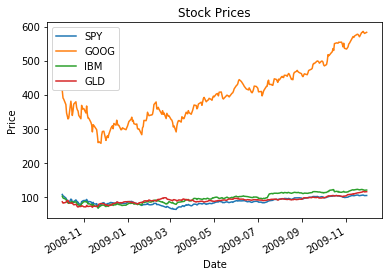

In [30]:
if __name__ == "__main__":
    start_date='2008-10-1'
    end_date='2009-11-30'
    dates=pd.date_range(start_date,end_date)
    
    symbols = ['GOOG', 'IBM', 'GLD']
    
    df = get_data(symbols, dates)
    plot_data(df)

In [31]:
def plot_selected(df,columns,start_index,end_index):
    #given the start and end dates, plot the relevant info
    plot_data(df.ix[start_index:end_index,columns], title="Selected Data")

In [32]:
def normalize_data(df):
    return df / df.ix[0,:]